In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectFromModel
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.utils.multiclass import unique_labels

from sklearn import preprocessing

import sys
import pandas as pd
import numpy as np

import joblib
import pickle

from IPython import get_ipython

import matplotlib.pyplot as plt

from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier

In [25]:
data = pd.read_csv('selfie_dataset.txt', 
                        sep=" ", 
                        header=None, 
                        names=["Nome","Rate", "partial_faces", "is_female", "baby", "child","teenager", "youth", "middle_age","senior", "white", "black","asian", "oval_face", "round_face",
                                "heart_face", "smiling", "mouth_open","frowning", "wearing_glasses", "wearing_sunglasses","wearing_lipstick","2tongue_out0", "duck_face","black_hair",
                                 "blond_hair", "brown_hair","red_hair", "curly_hair", "straight_hair","braid_hair", "showing_cellphone", "using_earphone","using_mirror", "wearing_hat"
                                 ,"braces","harsh_lighting","dim_lighting"])

                                  
print('The shape of our features is:', data.shape)

The shape of our features is: (46836, 38)


In [26]:
labels_aux = np.array(data['Rate'])
features1= data.drop("Rate", axis = 1)
features2= features1.drop("Nome", axis = 1)


features = np.array(features2)
feature_list = list(features2.columns)




In [4]:
mx = max(labels_aux)
mn = min(labels_aux)

labels = []
for i in labels_aux:
    if  ((i >= 0       )    and (i < (mx+mn)/3)):
        labels.append(1)
    elif((i >= (mx+mn)/5)   and (i < 2*(mx+mn)/5)):
        labels.append(2)
    elif((i >= 2*(mx+mn)/5) and (i < 3*(mx+mn)/5)):
        labels.append(3)
    elif((i >= 3*(mx+mn)/5) and (i < 4*(mx+mn)/5)):
        labels.append(4)
    elif((i >= 4*(mx+mn)/5) and (i < 5*(mx+mn)/5)):
        labels.append(5)
            
            


In [27]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.1)

In [7]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [29]:
a = [0,1,2,3,4,5,6,7,8,9,10]
ab = np.array(a)
plot_confusion_matrix(test_labels, predictions, classes=ab,
                      title='Confusion matrix Selfies')

NameError: name 'plot_confusion_matrix' is not defined

In [69]:
estimator = rf.estimators_[100]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names  = feature_list,
                class_names = feature_list,
                rounded = True, proportion = False, 
                precision = 2, filled = True)




In [17]:
rf = joblib.load("classifier.pkl")

In [34]:
crf = joblib.load("regressor.pkl")

rf = SelectFromModel(crf, threshold=0.04)
rf.fit(train_features, train_labels)

train_features = rf.transform(train_features)
test_features = rf.transform(test_features)

print('The shape of our important_train_features is:', train_features.shape)
print('The shape of our important_test_features is:', test_features.shape)

rf_important = RandomForestRegressor(n_estimators=200,random_state=1)

rf_important.fit(train_features, train_labels)

rf = rf_important

print(rf_important)
print("\n\n")
predictions = rf_important.predict(test_features)
importances = list(rf_important.feature_importances_)

The shape of our important_train_features is: (42152, 9)
The shape of our important_test_features is: (4684, 9)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)





In [ ]:
rf = RandomForestRegressor(n_estimators = 1000,random_state = 42)
rf.fit(train_features, train_labels)
#joblib.dump(rf, 'classifier.pkl') 

In [11]:
predictions = rf.predict(test_features)

In [30]:
errors = abs(predictions - test_labels)
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)

In [31]:

print('Mean Absolute Error:', round(np.mean(errors), 1), 'degrees.')
print('Accuracy:', accuracy)

Mean Absolute Error: 0.2 degrees.
Accuracy: 91.04391634596652


In [43]:
print("Importances: ")
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
for pair in feature_importances:
    print('{} : {}'.format(*pair))

Importances: 
senior : 0.143
white : 0.1327
teenager : 0.1309
partial_faces : 0.1184
baby : 0.1066
is_female : 0.0986
child : 0.098
middle_age : 0.0896
youth : 0.0823


In [17]:
%matplotlib inline

Text(0.5, 1.0, 'Variable Importances')

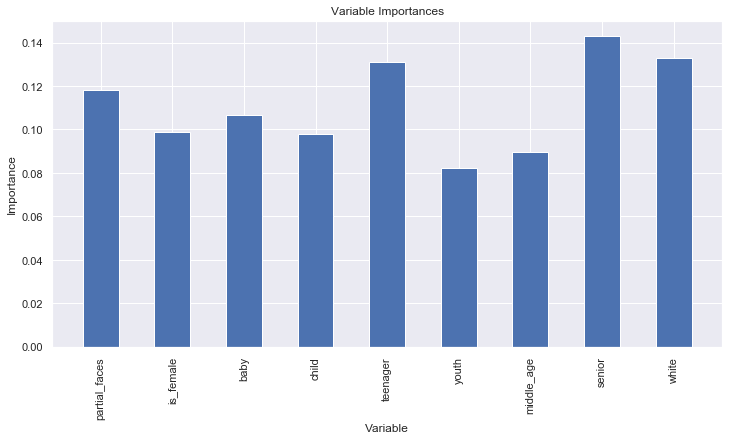

In [44]:
x_values = list(range(len(importances)))
plt.figure(figsize=(12, 6))
plt.bar(x_values, importances, orientation = 'vertical',width=0.5)
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')

<Figure size 432x288 with 0 Axes>